In [89]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from SpatialMetrics import AspectRatio
from Util import Parser

In [90]:
# Compute AR mean for all datasets in the sw_datasets.txt file
with open('../sw_datasets.txt') as f:
    datasets = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
datasets = [x.strip() for x in datasets] 

In [91]:
git_ar = []
sgi_ar = []

for dataset_id in datasets:
    history_git = Parser.parse_rectangles("git", dataset_id)
    history_sgi = Parser.parse_rectangles("sqrgit", dataset_id)
    
    all_ratios_git = np.array([])
    all_ratios_sgi = np.array([])
    
    for revision in range(len(history_git) - 1):
        ratios_git = AspectRatio.compute_aspect_ratios(history_git[revision])
        all_ratios_git = np.append(all_ratios_git, ratios_git.values)

        ratios_sgi = AspectRatio.compute_aspect_ratios(history_sgi[revision])
        all_ratios_sgi = np.append(all_ratios_sgi, ratios_sgi.values)

    git_ar.append(all_ratios_git.mean())
    sgi_ar.append(all_ratios_sgi.mean())

In [92]:
git_ar

[0.4886985889040904,
 0.46244907324459128,
 0.25133392887274802,
 0.41127750908977045,
 0.39011640076597065,
 0.44877363410409188,
 0.37649680693604837,
 0.33187122311109246,
 0.32036609694879492,
 0.34792432075079371,
 0.43866780771838976,
 0.32214665081001731,
 0.36587455648104455,
 0.29530420627756027,
 0.45915057383598895,
 0.41009257639222357,
 0.37958906649171797,
 0.37449718788476599,
 0.36659872425060963,
 0.47319282243004701,
 0.35080829908764655,
 0.50975943957629632,
 0.25273704055701685,
 0.51216823699095471,
 0.2916498885275951,
 0.39622150668701628,
 0.37739429985505796,
 0.3773934143410218]

In [93]:
sgi_ar

[0.56483717393814681,
 0.45677620408181313,
 0.28041795310730866,
 0.40239909742150087,
 0.27538424403174988,
 0.45306349135000135,
 0.41212537371556213,
 0.34259180418883772,
 0.36749102494733443,
 0.4607514112857839,
 0.41448595335475075,
 0.28150396924601523,
 0.38097600896017936,
 0.26300149971016157,
 0.45011791481082558,
 0.47397348427558705,
 0.37248222068612952,
 0.3125037906293503,
 0.29019625951281208,
 0.44806017512532315,
 0.30817761575561387,
 0.47218279891761206,
 0.21446242137193056,
 0.46440217527840771,
 0.27154195124310726,
 0.3943908943467539,
 0.32562638985643588,
 0.2380592948095388]

In [94]:
index = np.arange(len(datasets))
avg_git = sum(git_ar) / len(git_ar)
avg_sgi = sum(sgi_ar) / len(sgi_ar)

git_ar.append(avg_git)
sgi_ar.append(avg_sgi)
index = np.append(index, 30)
datasets.append('AVERAGE')

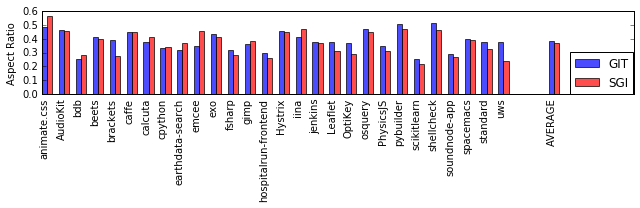

In [107]:


fig, ax = plt.subplots(figsize=(9, 3))
bar_width = 0.3
rects_git = plt.bar(index, git_ar, bar_width,
                 color='b',
                 alpha=.7,
                 edgecolor = "none",
                 label='GIT')

rects_sgi = plt.bar(index + bar_width, sgi_ar, bar_width,
                 color='r',
                 alpha=.7,
                 edgecolor = "none",
                 label='SGI')


# rects_git = plt.bar([30], [avg_git], bar_width,
#                  color='b',
#                  alpha=1,
#                  edgecolor = "none",
#                  label='GIT')

plt.ylabel('Aspect Ratio')
plt.xticks(index + bar_width / 2, datasets, rotation='vertical')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(.892,0), loc="lower left", borderaxespad=0)
plt.tight_layout()

plt.show()
fig.savefig('git-vs-sqrgit.png', dpi=300, bbox_inches="tight")

In [109]:
print("AVG GIT = ", avg_git)
print("AVG SGI = ", avg_sgi)

AVG GIT =  0.385091210033
AVG SGI =  0.37114223557
